In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Data Preprocessing 

/content/drive/My Drive/Python Collabs/Data Preprocessing


**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

**Load Data**

In [4]:
df=pd.read_csv("titanic-passengers.csv",sep=';')

**Showing the head of dataframe**

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


**Showing the dataframe infos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


**Finding the missing values**

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing Values in Titanic dataset')

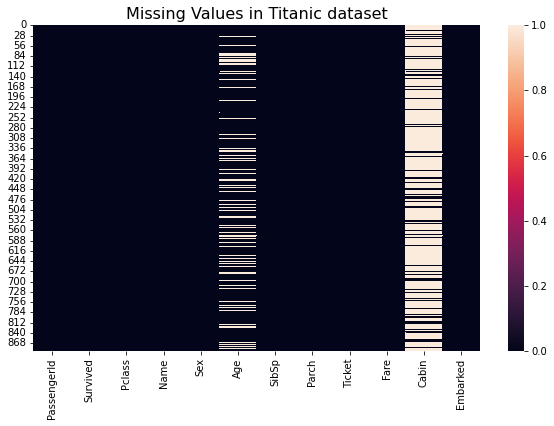

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values in Titanic dataset', size=16)

**Data replacing**



In [9]:
df.groupby('Sex').agg(['mean','median'])['Age']

,mean,median
Sex,,
female,27.915709,27.0
male,30.726645,29.0


In [10]:
tab_age=df.groupby('Sex').agg(['mean','median'])['Age']

Text(0.5, 1.0, 'Histogram of Age')

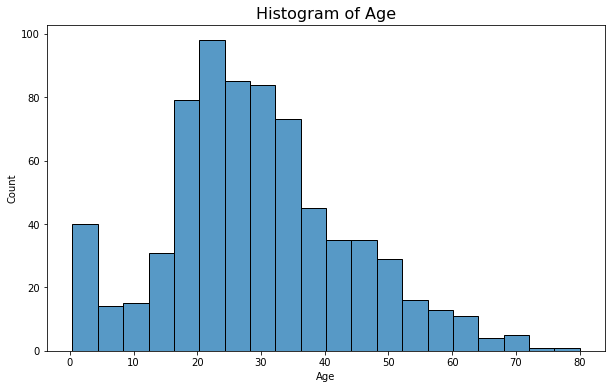

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])
plt.title('Histogram of Age', size=16)

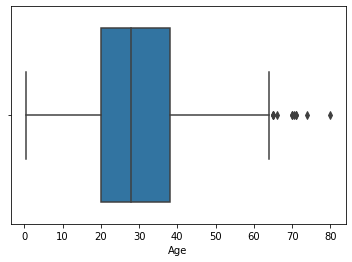

In [12]:
sns.boxplot(x=df["Age"])

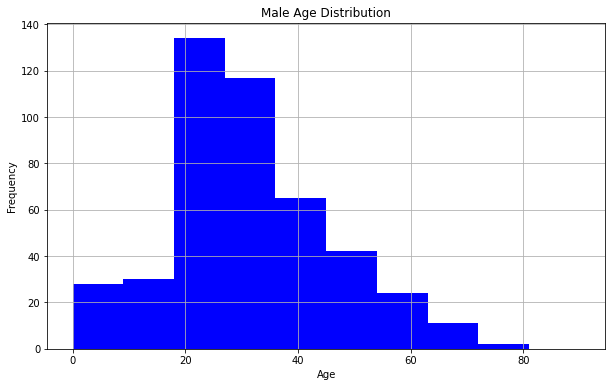

In [13]:
plt.figure(figsize=(10, 6))
dfm=[]
for i in range(0,len(df['Sex'])):
   if df['Sex'][i]=='male' and df['Age'][i]>0:
      dfm.append(df['Age'][i])

Xm=pd.Series(dfm)

# Create histogram
hist  =  Xm. hist( grid=True,range=(0,90), color="blue")


plt.title("Male Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

#plot graph
plt.show()

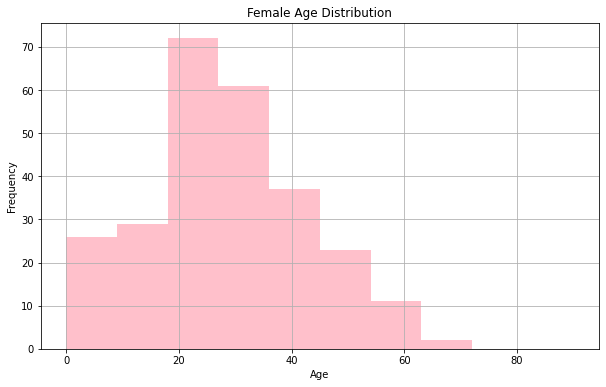

In [14]:
dff=[]
plt.figure(figsize=(10, 6))
for i in range(0,len(df['Sex'])):
   if df['Sex'][i]=='female' and df['Age'][i]>0:
      dff.append(df['Age'][i])

Xf=pd.Series(dff)

# Create histogram
hist  =  Xf. hist( grid=True,range=(0,90), color="pink")

plt.title("Female Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

#plot graph
plt.show()

In [15]:
df3=df.copy()
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [16]:
for i in range(0,len(df3['Age'])):
  if df3['Sex'][i]=="male" and df3['Age'].isnull()[i]:
     df3['Age'][i]=tab_age.loc["male","mean"].round(1)
  elif df3['Sex'][i]=="female" and df3['Age'].isnull()[i]:
     df3['Age'][i]=tab_age.loc["female","mean"].round(1)
  else:
     x=1

df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.7,0,0,349215,7.8958,NaN,S


Text(0.5, 1.0, 'Missing Values in Titanic dataset')

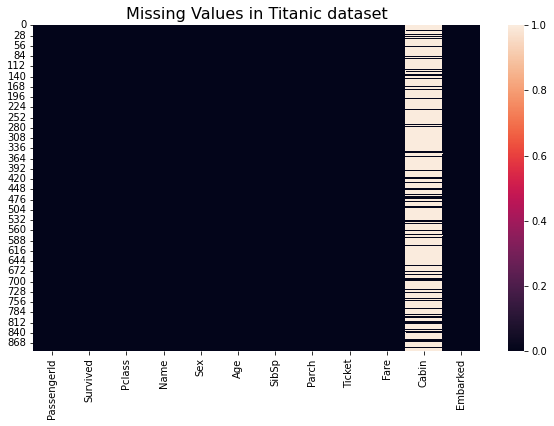

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df3.isnull())
plt.title('Missing Values in Titanic dataset', size=16)

**Data Transforming**

In [18]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
df3['Survived']=encoder.fit_transform(df3['Survived'])
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.7,0,0,349215,7.8958,NaN,S


**Survived Visualization**

0    0.616162
1    0.383838
Name: Survived, dtype: float64


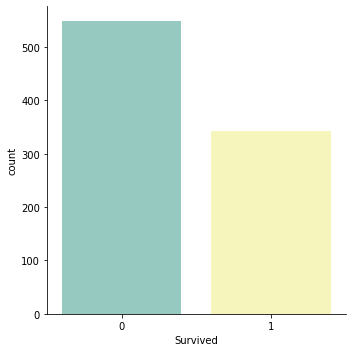

In [19]:
print(df3["Survived"].value_counts(normalize=True))
sns.catplot(x="Survived",kind="count",data=df3,palette="Set3")

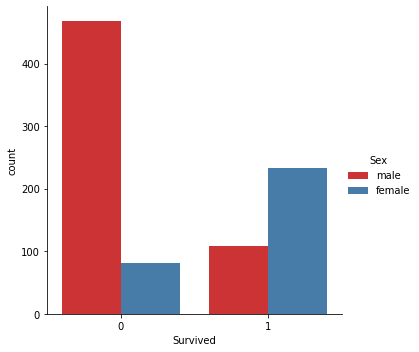

In [20]:
sns.catplot(x="Survived",kind="count",hue="Sex", data=df3,palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Embarked')

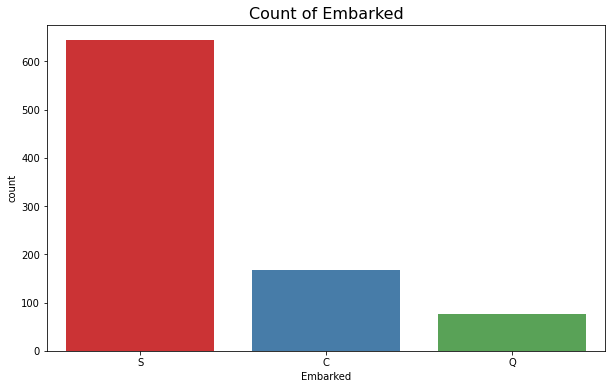

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot('Embarked', data=df3,palette="Set1")
plt.title('Count of Embarked', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class of Embarked over Survival')

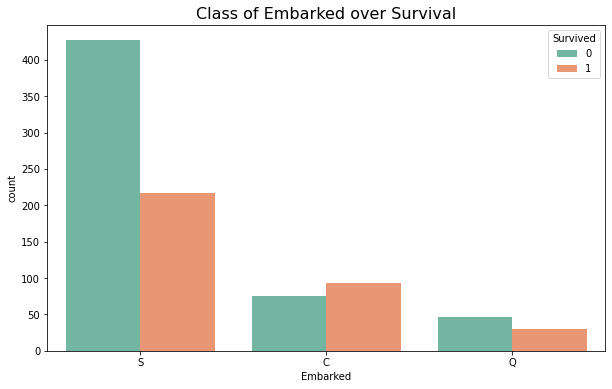

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(df3['Embarked'], hue= df3['Survived'],palette="Set2")
plt.title('Class of Embarked over Survival', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class of Passenger over Survival')

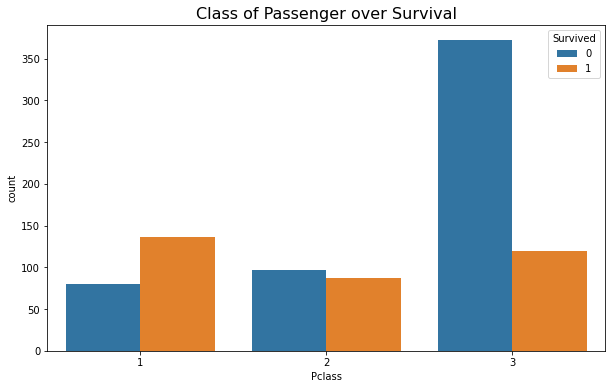

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(df3['Pclass'], hue= df3['Survived'])
plt.title('Class of Passenger over Survival', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Parch with respect to Survival')

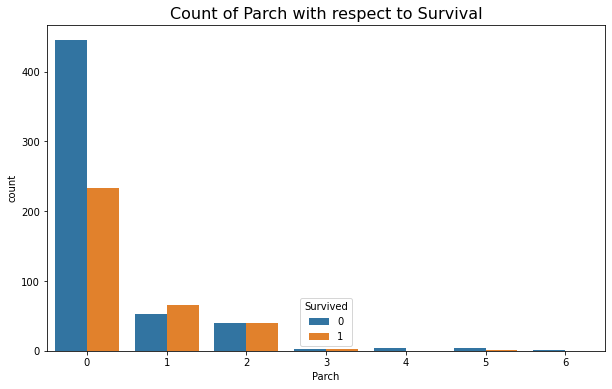

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(df3['Parch'], hue= df3['Survived'])
plt.title('Count of Parch with respect to Survival', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of SibSp with respect to Survival')

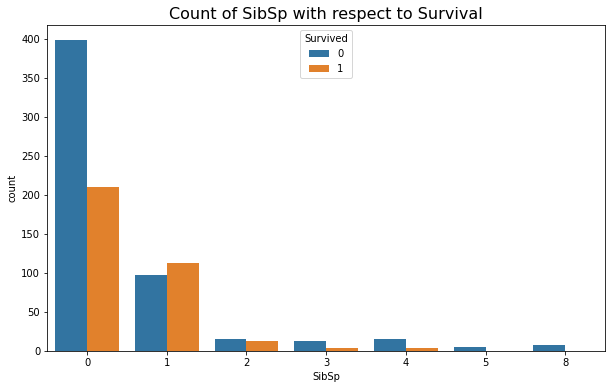

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(df3['SibSp'], hue= df3['Survived'])
plt.title('Count of SibSp with respect to Survival', size=16)